In [44]:
!apt install git

# Change to your working directory
%cd /content

# Clone the shared GitHub repository
!git clone https://github.com/Adamsomondi/BANK-CHURN-PREDICTION.git

# Move into the repo
%cd BANK-CHURN-PREDICTION

# Checks the contents of the repository
!ls -la

# Ensures you are in the correct repository
%cd /content/BANK-CHURN-PREDICTION

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/content
Cloning into 'BANK-CHURN-PREDICTION'...
remote: Enumerating objects: 244, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 244 (delta 22), reused 5 (delta 5), pack-reused 214 (from 3)
Receiving objects: 100% (244/244), 201.23 KiB | 1.02 MiB/s, done.
Resolving deltas: 100% (73/73), done.
/content/BANK-CHURN-PREDICTION
total 56
drwxr-xr-x 3 root root  4096 Mar 23 23:35 .
drwxr-xr-x 1 root root  4096 Mar 23 23:35 ..
-rw-r--r-- 1 root root 32380 Mar 23 23:35 Data_Preprocessing.ipynb
drwxr-xr-x 8 root root  4096 Mar 23 23:35 .git
-rw-r--r-- 1 root root    22 Mar 23 23:35 .gitignore
-rw-r--r-- 1 root root  5514 Mar 23 23:35 README.md
/content/BANK-CHURN-PREDICTION


In [45]:
import pandas as pd

# Correct direct file link
file_id = "1-6FhvYRRgceTptrIMfgvaXkq-QKw8dwf"
file_url = f"https://drive.google.com/uc?id={file_id}"

# Load the dataset
df = pd.read_csv(file_url)

df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [46]:
# Data preprocessing

# Identifying missing values
missing_values = df.isnull().sum()
print(missing_values)

# Encode Categorical Variables
# Check data types to identify categorical variables
print(df.dtypes)

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Scale Numerical Features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_features)

from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Resolve Data Quality Issues
import numpy as np
from scipy import stats

df = df[(np.abs(stats.zscore(df[numerical_features])) < 3).all(axis=1)]

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Save Cleaned Data
# Create a 'data' directory if it doesn't exist.
import os
os.makedirs('data', exist_ok=True)

# Save Cleaned Data
cleaned_data_path = "data/cleaned_data.csv"

# Save the DataFrame to a CSV file
df.to_csv(cleaned_data_path, index=False)

print(f"Cleaned data saved to {cleaned_data_path}")

# Update the .gitignore file
gitignore_path = ".gitignore"
ignore_entry = "data/cleaned_data.csv\n"

# Ensure the .gitignore file exists and contains the ignore entry
with open(gitignore_path, 'a') as f:
    f.write(ignore_entry)

print("Updated .gitignore to exclude data/cleaned_data.csv")

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64
RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object
I

In [47]:
df


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,-1.731878,-0.783213,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,...,False,False,False,False,False,False,False,False,False,False
1,-1.731531,-0.606534,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,...,False,False,False,False,False,True,False,False,False,False
2,-1.731185,-0.995885,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,...,False,False,False,False,False,False,False,False,False,False
3,-1.730838,0.144767,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,...,False,False,False,False,False,False,False,True,False,False
4,-1.730492,0.652659,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.730492,-1.177652,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,...,False,False,False,False,False,False,True,False,False,False
9996,1.730838,-1.682806,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,...,False,False,False,False,False,False,True,False,True,False
9997,1.731185,-1.479282,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,...,False,False,False,False,False,False,False,False,False,True
9998,1.731531,-0.119356,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,...,False,False,False,False,True,False,True,True,False,False


In [48]:
#Exploratory data analysis

#Descriptive Statistics
# Sample Mean for numerical Columns
CreditScore_Mean=df["CreditScore"].mean()

print("The mean of creditscore is: ",CreditScore_Mean)

#Mean for all the Columns
ColumnMean=df.mean()
print(ColumnMean)

#Sample Median For Numerical Columns
Balance_median=df["Balance"].median()
print("The median of balance is",Balance_median)

#Median for all columnS
median=df.median()
print(median)

The mean of creditscore is:  0.0005990009161091378
RowNumber            -0.001300
CustomerId            0.000273
CreditScore           0.000599
Age                  -0.051240
Tenure               -0.000439
                        ...   
Geography_Spain       0.248801
Gender_Male           0.547505
Card Type_GOLD        0.249107
Card Type_PLATINUM    0.249515
Card Type_SILVER      0.250842
Length: 2951, dtype: float64
The median of balance is 0.3309282353007618
RowNumber             0.000173
CustomerId            0.000979
CreditScore           0.015222
Age                  -0.183251
Tenure               -0.004426
                        ...   
Geography_Spain       0.000000
Gender_Male           1.000000
Card Type_GOLD        0.000000
Card Type_PLATINUM    0.000000
Card Type_SILVER      0.000000
Length: 2951, dtype: float64


In [49]:

df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,9799.000000,9799.000000,9799.000000,9799.000000,9799.000000,9799.000000,9799.000000,9799.000000,9799.000000,9799.000000,9799.000000,9799.000000,9799.000000,9799.000000
mean,-0.001300,0.000273,0.000599,-0.051240,-0.000439,-0.000212,-0.025341,-0.000267,-0.010101,-0.001059,-0.009636,-0.009595,0.000129,-0.000099
std,1.000668,0.999795,0.996821,0.921442,0.999615,1.000208,0.947142,1.000172,1.000305,0.999797,0.992893,0.992946,0.999748,0.999929
min,-1.731878,-1.741069,-2.974996,-1.994969,-1.733315,-1.225848,-0.911583,-1.547768,-1.030670,-1.740268,-0.505931,-0.506866,-1.432445,-2.157972
25%,-0.869143,-0.868439,-0.688359,-0.660018,-0.695982,-1.225848,-0.911583,-1.547768,-1.030670,-0.853753,-0.505931,-0.506866,-0.721130,-0.865442
50%,0.000173,0.000979,0.015222,-0.183251,-0.004426,0.330928,-0.911583,0.646092,0.970243,-0.000516,-0.505931,-0.506866,-0.009816,-0.006707
75%,0.864640,0.865719,0.698109,0.388871,0.687130,0.819823,0.807737,0.646092,0.970243,0.857150,-0.505931,-0.506866,0.701498,0.856456
max,1.731878,1.734255,2.063884,2.963418,1.724464,2.795323,2.527057,0.646092,0.970243,1.737200,1.976555,1.972908,1.412812,1.741750


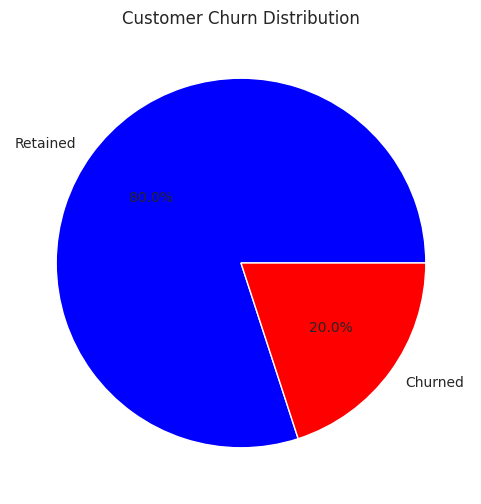

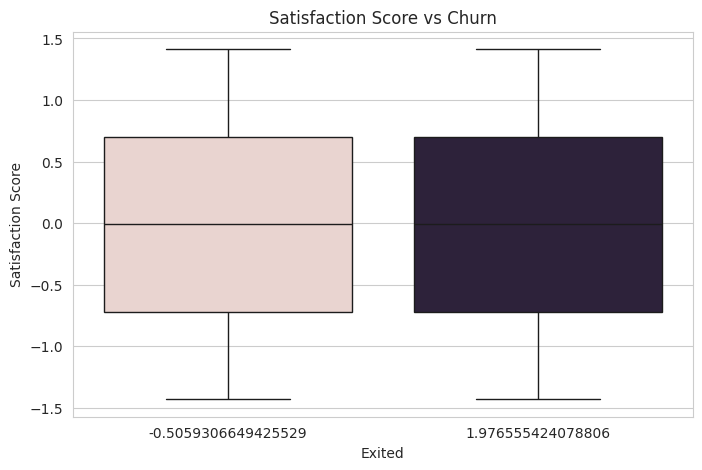

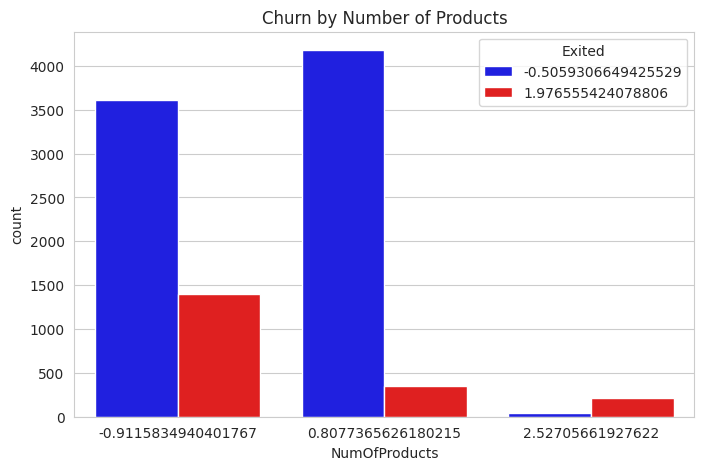

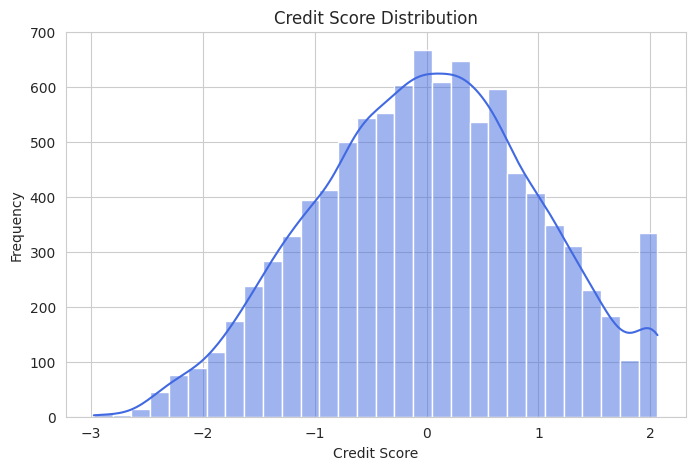

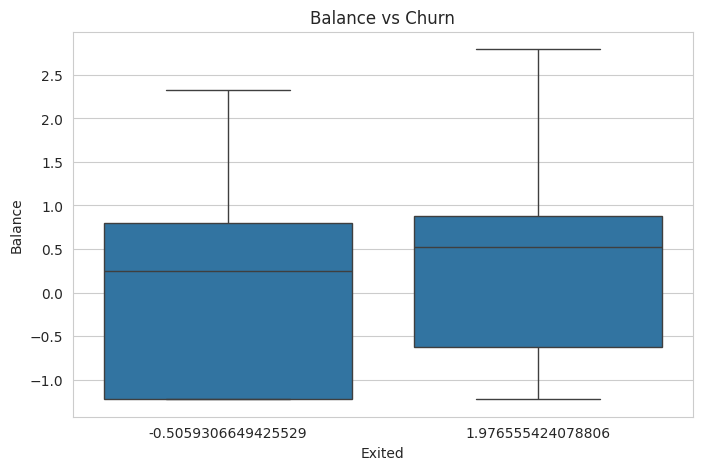

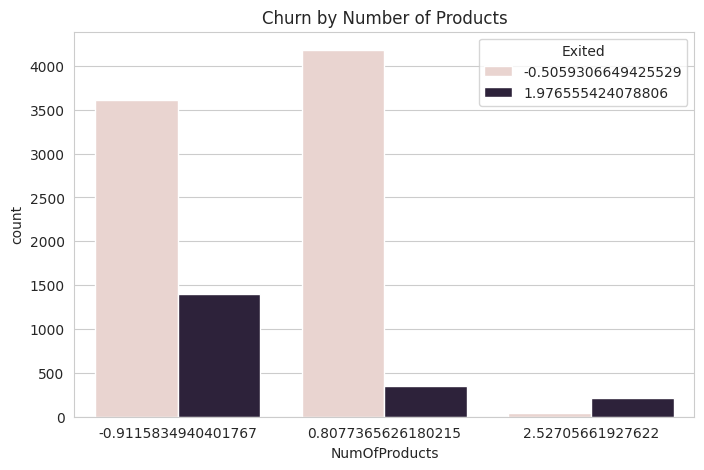

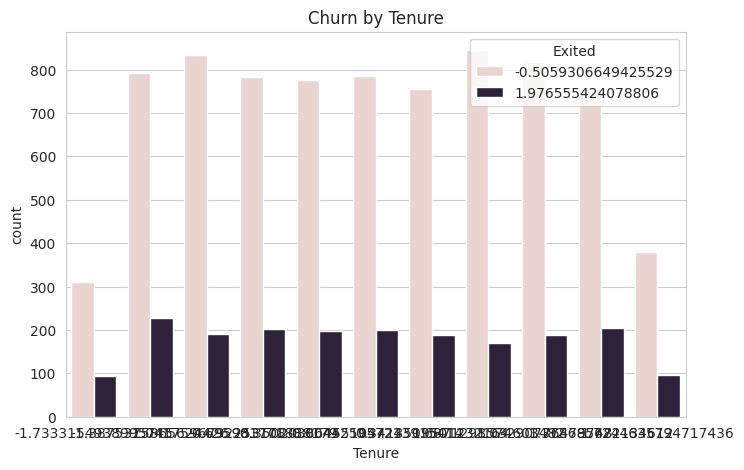

In [50]:
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Churn Distribution
churn_counts = df["Exited"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=["Retained", "Churned"], autopct="%1.1f%%", colors=["blue", "red"])
plt.title("Customer Churn Distribution")
plt.show()

# Churn by Customer Satisfaction Score
plt.figure(figsize=(8, 5))
sns.boxplot(x="Exited", y="Satisfaction Score", data=df, hue="Exited", legend=False)
plt.title("Satisfaction Score vs Churn")
plt.show()

# Churn by Number of Products
plt.figure(figsize=(8, 5))
sns.countplot(x="NumOfProducts", hue="Exited", data=df, palette=["blue", "red"])
plt.title("Churn by Number of Products")
plt.show()

# Credit Score Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["CreditScore"], bins=30, kde=True, color="royalblue")
plt.title("Credit Score Distribution")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.show()

# Balance vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x="Exited", y="Balance", data=df)
plt.title("Balance vs Churn")
plt.show()

# Number of Products vs Churn
plt.figure(figsize=(8, 5))
sns.countplot(x="NumOfProducts", hue="Exited", data=df)
plt.title("Churn by Number of Products")
plt.show()

# Tenure vs Churn
plt.figure(figsize=(8, 5))
sns.countplot(x="Tenure", hue="Exited", data=df)
plt.title("Churn by Tenure")
plt.show()


In [51]:
#Replace you-branch-name with what you are working on i.e edaanalysis etc..
!git checkout -b edaanalysis -q #meaning quite mode

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!ls -la "/content/drive/My Drive/Colab Notebooks"
!find "/content/drive/My Drive" -name "Eda_Analysis.ipynb" #replace "Data_Preprocessing.ipynb" with the name of your file i.e edaanalysis.ipynb

!cp "/content/drive/My Drive/Colab Notebooks/Eda_Analysis.ipynb" /content/BANK-CHURN-PREDICTION/ #replace Data_Preprocessing.ipynb with the name of your file

!ls -la "/content/BANK-CHURN-PREDICTION/"